In [1]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances

from sklearn.metrics import r2_score
import os
import subprocess

class my_model(BaseEstimator):

    #def __init__(self):
     #   self.demo_param = demo_param

    def fit(self, X, y):

        # Check that X and y have correct shape
        #X, y = check_X_y(X, y)
        # Store the classes seen during fit
        #self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
        # Return the classifier
        return self

    

        
        
    def predict(self, X):
        inputs = len(X[0])
        outputs = 1
        y = self.y_
        with open('temp.data', 'w') as csvfile:
            csvfile.write(str(inputs) + "," + str(outputs)+","+ str(len(X)) +",\n")
            for xx, yy in zip(X, y):
                zz = [*xx, yy]
                line = str(zz)[1:-1]+",\n"
                csvfile.write(line)
        proc = subprocess.Popen(['get_y', 'temp.data', 'train03.data', 'train07.data'], stdout=subprocess.PIPE)
        val = proc.communicate()[0].decode("utf-8")
        split_val = [float(s) for s in val.split()]
        
        return np.asarray(split_val)
    
    def score(self, X, y):
        return r2_score(y, self.predict(X))
        

In [2]:
def indexToName(ind):
    names = ['Irradiance','t max', 't_min', 'Relative Humidity %', 'Precipitation mm']
    snp_names = ['TURNORD','TURLEB','UZBBIG','UZBSMALL','ETHINEW','INDNEW','MEDIT']
    if ind < 7:
        return snp_names[ind]
    else:
        ind-=7
    
    
    if(ind < 125):
        return names[ind % 5] + ' at '  + str(ind // 5)
    else:
        return 'len of day of ' + str(ind-125)

In [3]:
X = np.load('X.npy')
y = np.load('y.npy')
model = my_model().fit(X,y)
pred_y = model.predict(X)
model.score(X,y)

0.5850964573793186

In [4]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X, y,
                           n_repeats=25,
                           random_state=0)

In [5]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{i}, {indexToName(i):<40}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

70, Relative Humidity % at 12               0.786 +/- 0.055
60, Relative Humidity % at 10               0.253 +/- 0.038
5, INDNEW                                  0.235 +/- 0.053
129, t_min at 24                             0.091 +/- 0.019
83, t max at 15                             0.024 +/- 0.010
149, len of day of 17                        0.019 +/- 0.005
2, UZBBIG                                  0.016 +/- 0.006
64, t_min at 11                             0.004 +/- 0.002


In [6]:
mean  = []
var = []
r_ = model.score(X,y)
for i in range(len(r.importances)):
    mean.append(np.mean(r.importances[i]-r_))
    var.append(np.var(r.importances[i]-r_))

mean

[-0.5897909204894372,
 -0.5843540787351906,
 -0.5692911675438362,
 -0.5848000655167016,
 -0.5850964573793186,
 -0.34984092611200374,
 -0.5862634125661227,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5851341156744847,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.58509

In [7]:
sorted(mean)[::-1]

[0.20046970244260456,
 -0.33255479053160003,
 -0.34984092611200374,
 -0.49451346842822913,
 -0.5612420372086119,
 -0.5658092044223124,
 -0.5692911675438362,
 -0.5806413208274971,
 -0.5836727102797028,
 -0.5843334150751615,
 -0.5843540787351906,
 -0.5848000655167016,
 -0.5848665534785791,
 -0.5850436170790709,
 -0.5850922231676443,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.5850964573793186,
 -0.585

In [8]:
mean.index(max(mean))

70

In [9]:
import pandas as pd

In [11]:
mean[70]

0.20046970244260456

In [10]:
var[70]

0.0029988834329972174

In [46]:
df = pd.read_csv('test_true03.data',delimiter=',', header=None)
X = df.iloc[:, 0:-2].to_numpy()
y = df.iloc[:, -2].to_numpy()

In [13]:
model = my_model().fit(X,y)
pred_y = model.predict(X)
model.score(X,y)

0.5850964573793186

In [14]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X, y,
                           n_repeats=25,
                           random_state=0)

In [15]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{i}, {indexToName(i):<40}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

70, Relative Humidity % at 12               0.786 +/- 0.055
60, Relative Humidity % at 10               0.253 +/- 0.038
5, INDNEW                                  0.235 +/- 0.053
129, t_min at 24                             0.091 +/- 0.019
83, t max at 15                             0.024 +/- 0.010
149, len of day of 17                        0.019 +/- 0.005
2, UZBBIG                                  0.016 +/- 0.006
64, t_min at 11                             0.004 +/- 0.002


(array([2., 0., 3., 4., 2., 9., 3., 0., 1., 1.]),
 array([0.6624349 , 0.68845825, 0.7144816 , 0.74050495, 0.76652831,
        0.79255166, 0.81857501, 0.84459836, 0.87062172, 0.89664507,
        0.92266842]),
 <BarContainer object of 10 artists>)

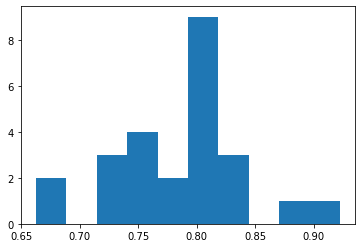

In [12]:
import matplotlib.pyplot as plt
plt.hist(r.importances[70])

In [16]:
indexToName(35)

'Relative Humidity % at 5'

In [17]:
indexToName(38)

't max at 6'

In [18]:
indexToName(19)

't_min at 2'

In [19]:
indexToName(40)

'Relative Humidity % at 6'